In [1]:
# Import Purchasing Tool
import pandas as pd
import numpy as np
df = pd.read_csv('original_data/Purchasing_Tool_FY16-FY18_2018-11-16.csv')
print(df.dtypes)
print(list(df))
df = df.dropna()

Supplier ID                object
PO                          int64
Line                        int64
Shipment                    int64
Release                   float64
StdCost                   float64
PoCost                    float64
BuyerNumber                object
BuyProgram                 object
BuyerName                  object
Part                       object
Description                object
Qty                       float64
ReceiverNumber             object
SupplierID                  int64
Year                        int64
Period                     object
Week                       object
Qtr                        object
CommodityLevel1            object
CommodityLevel2            object
CommodityLevel3            object
InternalCostSavings       float64
Spend                     float64
ForecastType               object
PurchLeadTime               int64
ABC                        object
PaymentTerm                object
SupplierClassification     object
Category      

In [3]:
# print (df['ABC'])
ABC_dict = {'A':0.8, 'B':0.5, 'C':0.2}
df['ABC'] = [ABC_dict[d] for d in df['ABC']]

print (df['ABC'])
print (df.dtypes)

50        0.5
75        0.8
76        0.8
84        0.2
89        0.2
91        0.2
97        0.2
112       0.8
113       0.8
119       0.5
161       0.2
163       0.5
172       0.2
185       0.8
188       0.8
196       0.2
197       0.2
198       0.5
235       0.5
259       0.8
260       0.8
261       0.8
262       0.8
263       0.8
264       0.8
280       0.5
300       0.5
301       0.2
318       0.8
319       0.2
         ... 
134873    0.2
134882    0.8
134892    0.5
134896    0.2
134907    0.8
134908    0.8
134909    0.8
134910    0.8
134911    0.8
134915    0.8
134923    0.2
134955    0.8
134956    0.8
134957    0.8
134958    0.8
134959    0.8
134965    0.8
134966    0.2
134967    0.2
134968    0.8
134969    0.8
134971    0.8
134972    0.8
135000    0.5
135125    0.2
135126    0.5
135130    0.2
135135    0.2
135162    0.8
135178    0.5
Name: ABC, Length: 16284, dtype: float64
Supplier ID                object
PO                          int64
Line                        int64
Shi

In [5]:
# Cast PurchLeadTime to float
df['PurchLeadTime'] = df['PurchLeadTime'].astype(float)
print(df.dtypes)
print(list(df))

Supplier ID                object
PO                          int64
Line                        int64
Shipment                    int64
Release                   float64
StdCost                   float64
PoCost                    float64
BuyerNumber                object
BuyProgram                 object
BuyerName                  object
Part                       object
Description                object
Qty                       float64
ReceiverNumber             object
SupplierID                  int64
Year                        int64
Period                     object
Week                       object
Qtr                        object
CommodityLevel1            object
CommodityLevel2            object
CommodityLevel3            object
InternalCostSavings       float64
Spend                     float64
ForecastType               object
PurchLeadTime             float64
ABC                       float64
PaymentTerm                object
SupplierClassification     object
Category      

In [3]:
#scale columns
from sklearn import preprocessing

y = df.filter(items=['Supplier ID', 'PO', 'Line', 'Shipment', 'Release', 'BuyerNumber', 'BuyProgram',
                     'BuyerName', 'Part', 'Description', 'ReceiverNumber', 'SupplierID', 'Year', 'Period',
                     'Week', 'Qtr', 'CommodityLevel1', 'CommodityLevel2', 'CommodityLevel3','Spend', 'ForecastType',
                     'ABC', 'PaymentTerm', 'SupplierClassification', 'Category', 'PoPlacedDate', 'PoPlacedYear',
                     'Org_Code', 'SupplierSite']
)
x = df.filter(items=['StdCost', 'PoCost', 'Qty', 'InternalCostSavings', 'Spend', 'PurchLeadTime'])
x
print(x.dtypes)
x2 = x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x2)
x3=pd.DataFrame(x_scaled, columns=x.columns)

df2= pd.concat([y, x3], axis=1)
df2


StdCost                float64
PoCost                 float64
Qty                    float64
InternalCostSavings    float64
Spend                  float64
PurchLeadTime          float64
dtype: object


,Vendor Code,Part,ABC2,StdCost,PoCost,Qty,InternalCostSavings,Spend,PurchLeadTime
0,173207,L45-0043-009,0.3,0.000002,0.000002,0.410778,0.416893,0.107971,0.035035
1,173207,L45-0043-009,0.3,0.000002,0.000002,0.410778,0.416893,0.107971,0.035035
2,173207,L45-0043-009,0.3,0.000002,0.000002,0.410778,0.416893,0.107971,0.035035
3,333875,L25-9287-012,0.3,0.000019,0.000019,0.410389,0.416893,0.108119,0.077077
4,333875,L25-9289-024,0.5,0.000018,0.000018,0.410389,0.416893,0.108111,0.098098
5,380971,L26-0012-332,0.3,0.000004,0.000004,0.411377,0.416949,0.108147,0.060060
6,1004072,10075-1365-05,0.7,0.000551,0.000551,0.410185,0.416893,0.108060,0.112112
7,1004072,10075-1365-05,0.7,0.000551,0.000551,0.410193,0.416893,0.108275,0.112112
8,1004072,10075-1365-05,0.7,0.000551,0.000551,0.410198,0.416893,0.108415,0.112112
9,103951,100-0010,0.3,0.000050,0.000047,0.410182,0.416893,0.107926,0.030030


In [4]:
df2['Qty'].max()

1.0

In [5]:
print(list(df2))

['Vendor Code', 'Part', 'ABC2', 'StdCost', 'PoCost', 'Qty', 'InternalCostSavings', 'Spend', 'PurchLeadTime']


In [6]:
print(df2.dtypes)
#generate risk sum
df2['RiskSum'] = np.nan
pd.to_numeric(df2['RiskSum'], downcast='float')
# print(df2.dtypes)
# print(df2['newCritical'])
for i, row in df2.iterrows():
    k = (df2['ABC2'][i]+df2['Spend'][i])*(df2['PoCost'][i]-df2['StdCost'][i]+df2['Qty'][i]
                                         -df2['InternalCostSavings'][i]+df2['PurchLeadTime'][i])
    df2.set_value(i,'RiskSum',k)
df2


# df2['RiskSum'] = np.nan
# pd.to_numeric(df2['RiskSum'], downcast='float')
# # print(df2.dtypes)
# # print(df2['newCritical'])
# for i, row in df2.iterrows():
#     k = (df2['ABC'][i]+df2['Spend'][i])*(df2['newCritical'][i]+df2['newLateNeed'][i]
#                                          +df2['StdCost'][i]+df2['PoCost'][i]+df2['Qty'][i]
#                                          -df2['InternalCostSavings'][i])
#     df2.set_value(i,'RiskSum',k)
# # df2

Vendor Code              int64
Part                    object
ABC2                   float64
StdCost                float64
PoCost                 float64
Qty                    float64
InternalCostSavings    float64
Spend                  float64
PurchLeadTime          float64
dtype: object


/software/anaconda3/5.2.0/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,Vendor Code,Part,ABC2,StdCost,PoCost,Qty,InternalCostSavings,Spend,PurchLeadTime,RiskSum
0,173207,L45-0043-009,0.3,0.000002,0.000002,0.410778,0.416893,0.107971,0.035035,0.011799
1,173207,L45-0043-009,0.3,0.000002,0.000002,0.410778,0.416893,0.107971,0.035035,0.011799
2,173207,L45-0043-009,0.3,0.000002,0.000002,0.410778,0.416893,0.107971,0.035035,0.011799
3,333875,L25-9287-012,0.3,0.000019,0.000019,0.410389,0.416893,0.108119,0.077077,0.028802
4,333875,L25-9289-024,0.5,0.000018,0.000018,0.410389,0.416893,0.108111,0.098098,0.055700
5,380971,L26-0012-332,0.3,0.000004,0.000004,0.411377,0.416949,0.108147,0.060060,0.022239
6,1004072,10075-1365-05,0.7,0.000551,0.000551,0.410185,0.416893,0.108060,0.112112,0.085173
7,1004072,10075-1365-05,0.7,0.000551,0.000551,0.410193,0.416893,0.108275,0.112112,0.085202
8,1004072,10075-1365-05,0.7,0.000551,0.000551,0.410198,0.416893,0.108415,0.112112,0.085220
9,103951,100-0010,0.3,0.000050,0.000047,0.410182,0.416893,0.107926,0.030030,0.009512


In [7]:
#scale risksum
y = df2.filter(items=['Vendor Code', 'Part Number','ABC2',
                     'StdCost', 'PoCost', 'Qty', 'InternalCostSavings', 'Spend', 'PurchLeadTime'])
x = df2.filter(items=['RiskSum'])
x
print(x.dtypes)
x2 = x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x2)
x3=pd.DataFrame(x_scaled, columns=x.columns)

df3= pd.concat([y, x3], axis=1)
df3

RiskSum    float64
dtype: object


,Vendor Code,ABC2,StdCost,PoCost,Qty,InternalCostSavings,Spend,PurchLeadTime,RiskSum
0,173207,0.3,0.000002,0.000002,0.410778,0.416893,0.107971,0.035035,0.298141
1,173207,0.3,0.000002,0.000002,0.410778,0.416893,0.107971,0.035035,0.298141
2,173207,0.3,0.000002,0.000002,0.410778,0.416893,0.107971,0.035035,0.298141
3,333875,0.3,0.000019,0.000019,0.410389,0.416893,0.108119,0.077077,0.312980
4,333875,0.5,0.000018,0.000018,0.410389,0.416893,0.108111,0.098098,0.336453
5,380971,0.3,0.000004,0.000004,0.411377,0.416949,0.108147,0.060060,0.307252
6,1004072,0.7,0.000551,0.000551,0.410185,0.416893,0.108060,0.112112,0.362173
7,1004072,0.7,0.000551,0.000551,0.410193,0.416893,0.108275,0.112112,0.362199
8,1004072,0.7,0.000551,0.000551,0.410198,0.416893,0.108415,0.112112,0.362215
9,103951,0.3,0.000050,0.000047,0.410182,0.416893,0.107926,0.030030,0.296145


Text(-0.001,0.5,'Count')

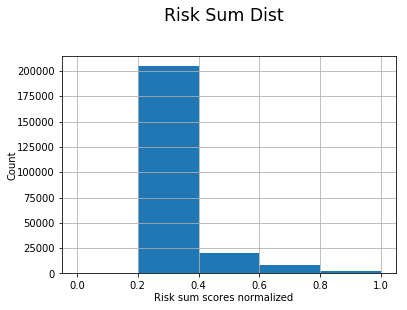

In [13]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

# drop sharex, sharey, layout & add ax=axes
df3['RiskSum'].hist(bins = 5, ax=axes)

# set title and axis labels
plt.suptitle('Risk Sum Dist', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.03, 'Risk sum scores normalized', ha='center')
fig.text(-.001, 0.5, 'Count', va='center', rotation='vertical')

Text(-0.001,0.5,'Count')

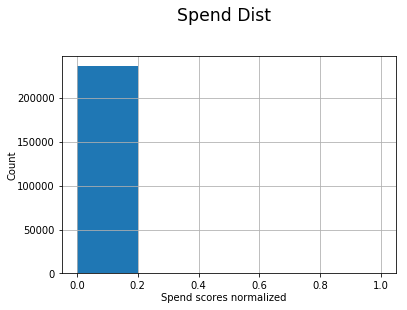

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
# drop sharex, sharey, layout & add ax=axes
df3['Spend'].hist(bins = 5, ax=axes)

# set title and axis labels
plt.suptitle('Spend Dist', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.03, 'Spend scores normalized', ha='center')
fig.text(-.001, 0.5, 'Count', va='center', rotation='vertical')

Text(-0.001,0.5,'Count')

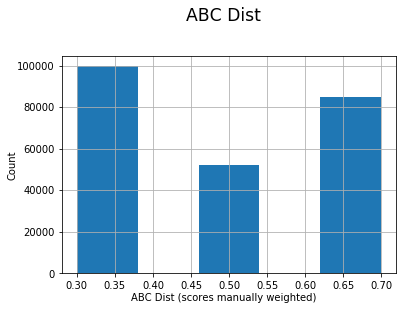

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
# drop sharex, sharey, layout & add ax=axes
df3['ABC2'].hist(bins = 5, ax=axes)

# set title and axis labels
plt.suptitle('ABC Dist', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.03, 'ABC Dist (scores manually weighted)', ha='center')
fig.text(-.001, 0.5, 'Count', va='center', rotation='vertical')

In [11]:
# df3[df3['RiskSum']>=0.9]
# df3['RiskSum'].hist()

In [12]:
df3.to_excel('PurchasingTool_Risk_Sum.xlsx', index = False)